# Feature Engineering
Processing datasets not in vector format into a vector format using vectorization, particularly categorical data into numerical data.

In [3]:
import sklearn
import pandas

## Categorical Features

In [7]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

#data is a list of dictionaries, each containing numerical price, numerical rooms and categorcal neighbourhood

### Using sklearn `DictVectorizer` class and `fit_transform()` method

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
vector = DictVectorizer(sparse = False, dtype = int)
vector.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [60]:
vector.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [6]:
data_p = pandas.DataFrame(data)
data_p
#data in the form of a pandas dataframe

,neighborhood,price,rooms
0,Queen Anne,850000,4
1,Fremont,700000,3
2,Wallingford,650000,3
3,Fremont,600000,2


### Using pandas `get_dummies()` method

In [14]:
pandas.get_dummies(data = data_p)

,price,rooms,neighborhood_Fremont,neighborhood_Queen Anne,neighborhood_Wallingford
0,850000,4,0,1,0
1,700000,3,1,0,0
2,650000,3,0,0,1
3,600000,2,1,0,0


## Text Features

In [44]:
sample = ['problem of evil',
        'evil queen',  
        'horizon problem']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
text_vector = CountVectorizer()

In [50]:
X = text_vector.fit_transform(sample)

In [51]:
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [52]:
pandas.DataFrame(X.toarray(), 
                 columns = text_vector.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


## Derived Features

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

In [101]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])

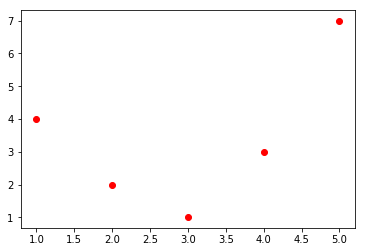

In [102]:
plt.scatter(x,y, color = "red")

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
X = x[:,np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [105]:
model = LinearRegression().fit(X, y)

In [106]:
yfit = model.predict(X)
yfit

array([2. , 2.7, 3.4, 4.1, 4.8])

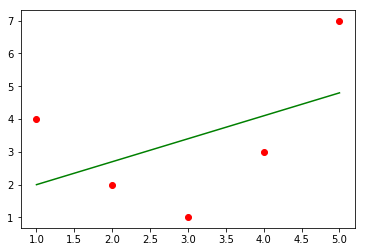

In [107]:
plt.scatter(x, y, color = "red")
plt.plot(x, yfit, color = "green")

#Linear regression model poorly fit line against data

In [108]:
from sklearn.preprocessing import PolynomialFeatures


In [109]:
poly = PolynomialFeatures(degree = 3, include_bias=False)

In [110]:
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [111]:
model = LinearRegression().fit(X2, y)

In [112]:
yfit = model.predict(X2)

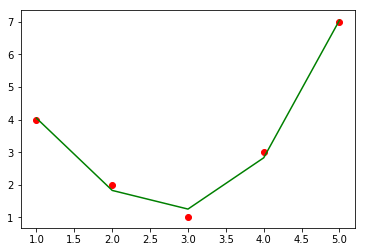

In [113]:
plt.scatter(x, y, color = "red")
plt.plot(x, yfit, color = "green")

## Imputation of Missing Data

In [133]:
import numpy

In [138]:
X= numpy.array([[numpy.nan,0, 3],
            [3, 7, 9],
            [3, 5, 2],
            [4, numpy.nan,6],
            [8, 8, 1]])

y = numpy.array([14, 16, -1,  8, -5])

In [139]:
from sklearn.preprocessing import Imputer

In [140]:
imp = Imputer(strategy = "mean")

In [142]:
X2 = imp.fit_transform(X)
X2

#two missing values filled in with the mean

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [143]:
model = LinearRegression().fit(X2, y)

In [144]:
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Pipelines

In [145]:
from sklearn.pipeline import make_pipeline

In [146]:
model = make_pipeline(Imputer(strategy = "mean"),
                     PolynomialFeatures(degree = 2),
                     LinearRegression())

In [147]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [148]:
y

array([14, 16, -1,  8, -5])

In [152]:
y_pred = model.predict(X)
y_pred

#Note the model was applied to same data it was trained on, 
#which is why y_pred perfectly predicts y

array([14., 16., -1.,  8., -5.])